# **A. TỔNG QUAN VỀ CÂY QUYẾT ĐỊNH**

## 1. Khái niệm

***Cây Quyết Định*** là một mô hình Học máy có giám sát sử dụng một tập hợp các quy tắc để đưa ra quyết định, khá tương đồng với cách mà con người chúng ta đưa ra quyết định.
  
      Hôm nay trời mưa lớn, có sấm chớp -> Không nên ra ngoài chơi (0)

      Hôm nay trời không mưa, không có sấm chớp -> Có thể ra ngoài chơi (1)

***Cây Quyết Định*** là mô hình được ưa chuộng trong thực tế bởi tính khả thi của nó. Mô hình sẽ dựa trên các yếu tố, các sự kiện, đặc tả hiện thực, ... để đưa ra quyết định cuối cùng. Trên hết, ta có thể tìm ra câu trả lời cho câu hỏi: "*Tại sao lại có quyết định đó?*".

## 2. Chiến lược

Mô hình ***Cây Quyết Định*** được xây dựng dựa trên một bộ quy tắc đơn giản nhưng vô cùng mạnh và hiệu quả: *Chia mẫu dữ liệu ban đầu thành các mẫu dữ liệu nhỏ có tính ổn định cao*.

2.1. Entropy

Để thực hiện việc chia mẫu dữ liệu một cách hợp lí, ta cần một công cụ đánh giá có độ ổn định và chính xác cao. Chỉ số *entropy* trong lĩnh vực Xác suất & Thống kê với mục đích nhận định tính hỗn độn của một mẫu dữ liệu

$$\begin{align}H(X) = -  \sum_{i=1}^{N}P(X_i) \log_2 P(X_i) \end{align}$$

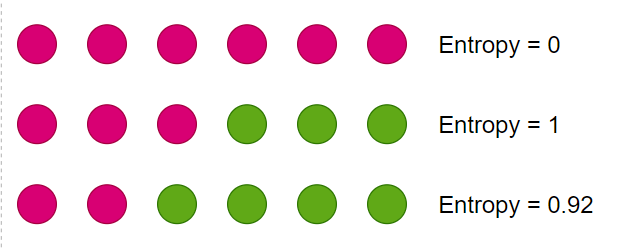

Lần lượt tính entropy cho các mẫu trong hình vẽ:
  
  
  $\ H_{(1)} = - (\frac{6}{6} * \log_2\frac{6}{6}) = 0$

  $\ H_{(2)} = - (\frac{3}{6} * \log_2\frac{3}{6} + \frac{3}{6} * \log_2\frac{3}{6}) = 1 $

$\ H_{(3)} = - (\frac{2}{6} * \log_2\frac{2}{6} + \frac{4}{6} * \log_2\frac{4}{6}) = 0.92 $

Nhận thấy chỉ số Entropy của mẫu dữ liệu càng lớn thì độ ổn định càng thấp.

2.2. Information gain

Chỉ số *Information Gain* thể hiện độ tăng thông tin (tăng độ ổn định) của các mẫu dữ liệu con so với mẫu dữ liệu cha ban đầu

$$ Information Gain = Entropy_{BeforeSplitting} - Entropy_{After Splitting} $$

Cho mẫu dữ liệu $T$, chia $T$ thành câc mẫu dữ liệu nhỏ hơn $S_{a}(v) = \{\ x \in T{\mid}x_{a} = v \}\ $

Entropy của các mẫu $S_a(v)$:
$$H(T{\mid}a) = \sum_{v \in unique(a)} \frac{\mid S_a(v) \mid}{\mid T \mid} * H(S_a(v)) $$

Độ tăng thông tin so với mẫu $T$ ban đầu:
$$\ IG(T{\mid}a) = H(T) - H(T{\mid}a)$$

Nếu chỉ số $\ IG(T{\mid}a)$ > 0 $\Rightarrow$ Bộ dữ liệu $T$ đã được chia thành các bộ dữ liệu nhỏ có độ ổn định cao hơn so với mẫu ban đầu

Từ đó, hình thành chiến lược xuyên suốt quá trình xây dựng cây quyết định: Tìm cách chia mẫu dữ liệu thành các mẫu nhỏ hơn sao cho chỉ số *Information_Gain* lớn hơn 0 (Cách chia tối ưu nhất là chọn cách chia có chỉ số *Information_Gain* lớn nhất có thể và mang giá trị dương)


2.3. Gain ratio

Chỉ số *Gain ratio* thể hiện độ khuếch đại mức tăng thông tin so với chính nó ban đầu
$$ Gain Ratio = \frac{InformationGain} {Split Info}$$

Một cách đơn giản để hiểu: Nếu *Entropy* rất nhỏ thì *Gain ratio* sẽ rất cao và ngược lại

$$Split Info(T) = - \sum_{i=1}^{N} \frac{N(T_i)}{N(T)} * \log_2\frac{N(T_i)}{N(T)}$$

Chỉ số trên còn có tên gọi là *Intrinsic Value*

Khi ta coi các phần tử trong tập các con $T_i$ của $T$ đều tương đồng về vai trò trong tập $T$ thì khi đố chỉ số *Split Info* sẽ trở thành i ta coi các phần tử trong tập các con $T_i$ của $T$ đều tương đồng về vai trò trong tập $T$ thì khi đố chỉ số *Split Info* sẽ trở thành chỉ số *Entropy* của $T$

$$IGR(T{\mid}a) = \begin{align}\frac{H(T) - H(T{\mid}a)}{- \sum_{i=1}^{N} \frac{N(T_i)}{N(T)} * \log_2\frac{N(T_i)}{N(T)}}\end{align}$$

## 3. Triển khai chiến lược

Trong thực tế việc chia mẫu dữ liệu ban đầu thành nhiều nhất các mẫu dữ liệu con với chỉ số *Entropy* trên từng mẫu gần như bằng 0 luôn là điều ta mong muốn, nhưng điều đó sẽ gây khó dễ cho lập trình viên trong việc lập trình bởi sự khó khắn trong kiểm soát số lượng Node con của một Node cha. Do đó, sử dụng *Cây Nhị Phân* làm bộ khung cho *Cây Quyết Đinh* sẽ làm tăng tính ổn định trong quá trình lập trình cũng như chạy chương trình. Ngược lại *Cây Quyết định Nhị phân* sẽ cần nhiều bộ nhớ hơn để hoạt động.

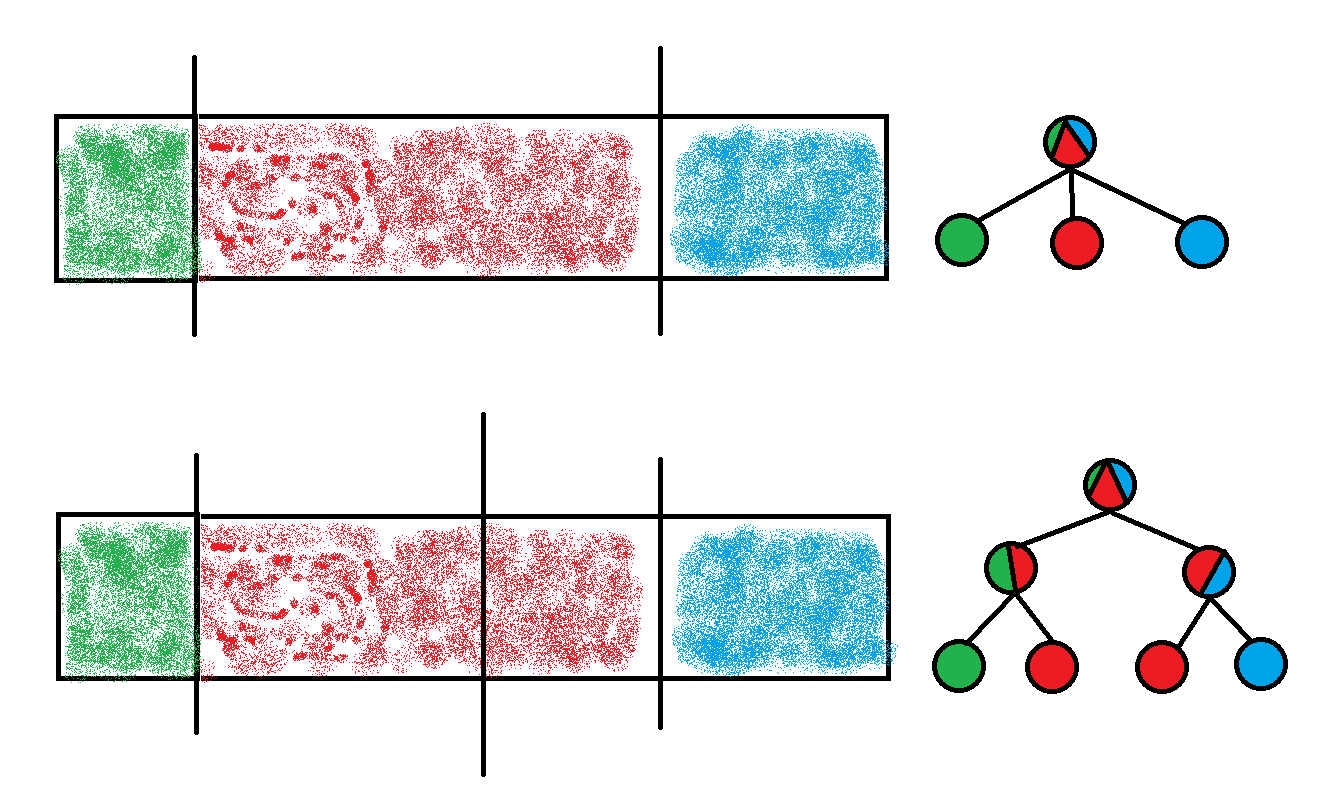

Việc chia thành 2 hay nhiều hơn các node con đều không ảnh hưởng tới kết quả cuối cùng, bản chất vẫn chỉ là đưa mẫu dữ liệu về các mẫu nhỏ và có độ ổn định cao 

Cùng bắt đầu với 1 ví dụ cụ thể (Nguồn: Wikipedia)

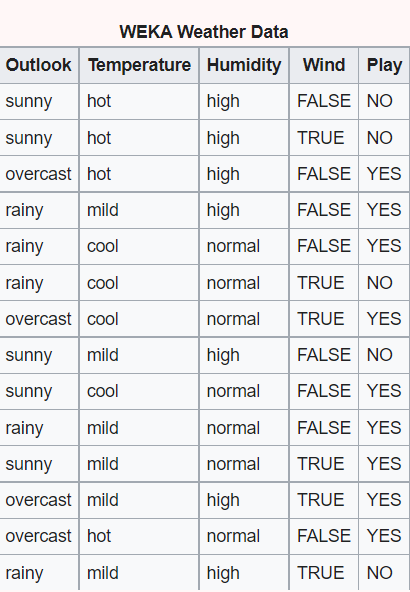

Ta sẽ có một Cây Quyết đinh Nhị phân như sau

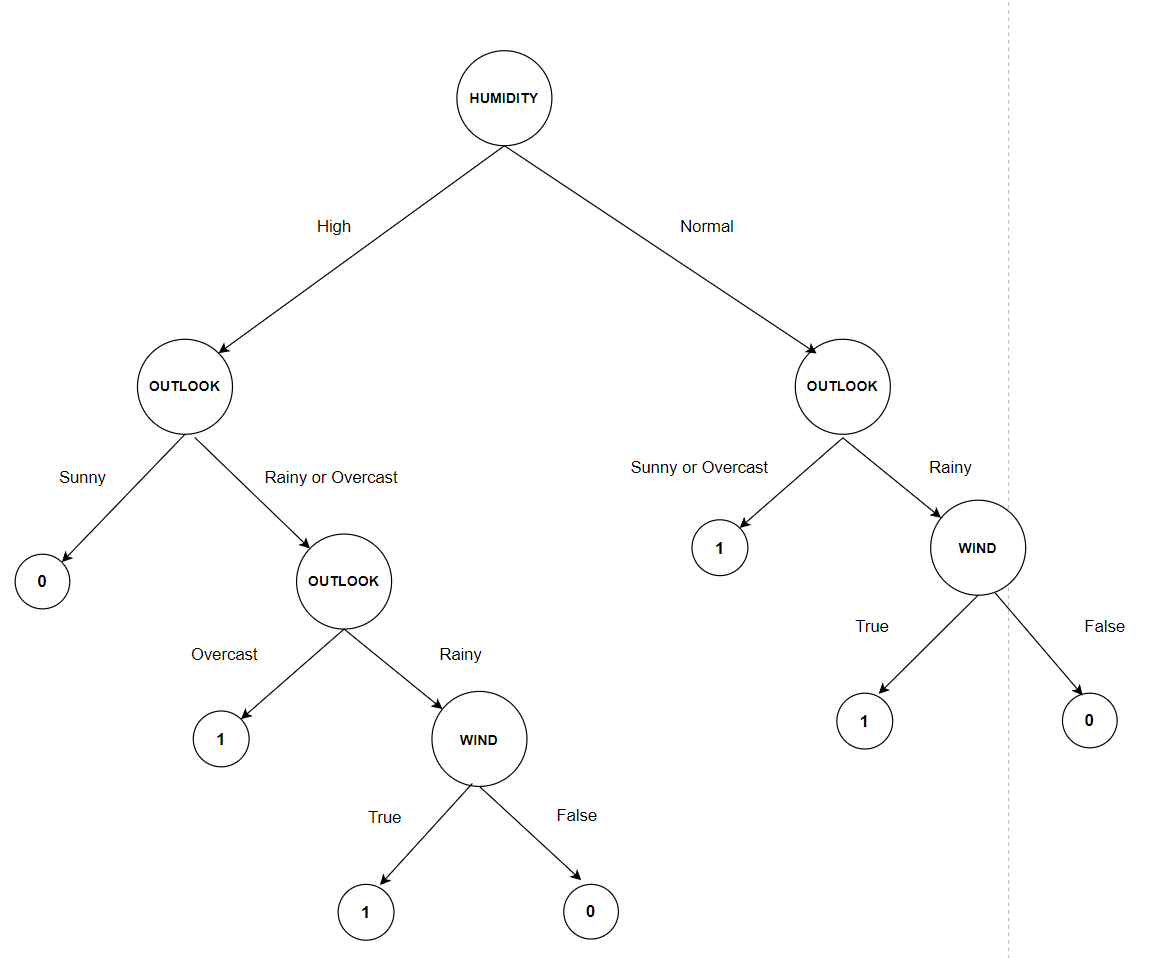

Các bước xây dựng Cây Quyết định Nhị phân

1. Tìm trong tất cả các thuộc tính (feature) của dữ liệu, trong mỗi thuộc tính tìm ra một ngưỡng (threshold) cụ thể để chia thuộc tính cũng như mẫu dữ liệu thành 2 mẫu mới sao cho đạt được chỉ số *IGR* cao nhất và có giá trị lớn hơn 0
2. Tiến hành chia theo ngưỡng đã tìm được, lưu các thông tin khi chia (feature, threshold, IGR) phục vụ cho việc dự đoán (predict) sau này
3. Lặp lại 2 bước trên với các mẫu dữ liệu con đến khi mẫu dữ liệu con đạt chuẩn (<= min_samples_split or *IGR* <= 0) thì dừng lại và đưa ra quyết định dựa trên số lượng nhãn có số lượng nhiều nhất trong mẫu 

4. Khi các nút lá đã được hình thành, cần đưa ra được quyết định cuối cùng của chuỗi suy luận bằng cách chọn ra nhãn xuất hiện nhiều nhất trong các bản ghi của nút lá. Việc này sẽ tránh được rủi ro ở mức cao nhất

# **B. TRIỂN KHAI THUẬT TOÁN**

## 1. Nạp các thư viện

In [ ]:
import numpy as np
import pandas as pd

## 2. Xây dựng Nút của cây

In [ ]:
class Node:
  def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain_ratio=0, value=None, curr_depth=0):
    '''
    For decision node
    '''
    self.feature_index = feature_index
    self.threshold = threshold
    self.left = left
    self.right = right
    self.info_gain_ratio = info_gain_ratio

    ''' 
    For value node
    '''
    self.value = value
    '''
    For render 
    '''
    self.curr_depth = curr_depth
  
  def display(self):
    print('current depth =', self.curr_depth)
    print('feature index =', self.feature_index) 
    print('threshold =', self.threshold)
    print('information gain ratio =', self.info_gain_ratio)
    print('value =', self.value)
    print('------------------------------')
    if self.left is not None:
      print('Left of', self.feature_index)
      self.left.display()
    if self.right is not None:
      print('Right of', self.feature_index)
      self.right.display()  

## 3. Xây dựng cây hoàn chỉnh

In [ ]:
class DecisionTreeClassifier:
  def __init__(self, root=None, min_samples_split=2, max_depth=100, mode='entropy'):
    '''
    Head of the tree
    '''
    self.root = root
    
    '''
    Stop conditions
    '''
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.loss = 0
    self.mode = mode
    '''
    Parameters during training
    '''
    self.dataset_size = 0 
    self.training_progress = 0 # ratio in [0, 1] = len(tuple_passed) / len(dataset)
    self.trained_datapoints = 0
    '''
    Print parameters
    '''
    print('Decision Tree Classifier', end='(')
    print('min_samples_split=' + str(min_samples_split), end=', ')
    print('max_depth=' + str(max_depth), end=')\n')


  '''
  BUILDING TREE
  '''

  def build_tree(self, dataset, curr_depth=0):
    '''
    @param
      dataset
      curr_depth(current depth of tree)
    @return
      Node
    '''    
    X, Y = dataset[ : , : -1], dataset[ : , -1]
    
    num_samples, num_features = np.shape(X)
    
    if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
      ''' 
      Find best split for dataset
      '''
      best_split = self.get_best_split(dataset, num_features)
      if best_split != {}:
        # print(best_split['feature_index'], best_split['threshold'], best_split['info_gain_ratio'])
        if best_split['info_gain_ratio'] > 0:
          '''
          Build 2 branches of parent node
          '''               
          l_child = self.build_tree(best_split['dataset_left'], curr_depth+1)     

          r_child = self.build_tree(best_split['dataset_right'], curr_depth+1)
          '''
          Complete a decision node
          '''
          # print(curr_depth, '|', best_split)
          new_node = Node(feature_index=best_split['feature_index'],
                          threshold=best_split['threshold'],
                          left=l_child, right=r_child,
                          info_gain_ratio=best_split['info_gain_ratio'],
                          curr_depth=curr_depth)
          # new_node.display()
          return new_node

    '''
    Complete a value node by generating value of leaf
    '''
    leaf_value, leaf_loss = self.generate_leaf_value(Y)

    self.loss += (2**(-curr_depth)) * leaf_loss

    self.display_progress(len(Y))

    return Node(value=leaf_value, curr_depth=curr_depth)
  
  def get_best_split(self, dataset, num_features):
    ''' 
    -Find the best way to split dataset into 2 new datasets 
    -best_split include: 
      feature_index(the feature which chose for split)
      threshold
      dataset_left
      dataset_right
      info_gain_ratio(information_gain_ratio of parent node)
    '''
    best_split = {}
    max_IGR = -float('inf') 
    
    for feature_index in range(num_features):
      feature_values = dataset[ : , feature_index]
      possible_threshold = np.unique(feature_values)

      if len(possible_threshold) == 1: 
        continue

      for threshold in possible_threshold:
        dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
        if len(dataset_left) > 0 and len(dataset_right) > 0:
          labels, l_labels, r_labels = dataset[ : , -1], dataset_left[ : , -1], dataset_right[ : , -1]
          
          ''' Find information_gain_ratio '''
          curr_IGR = self.information_gain_ratio(labels, l_labels, r_labels, mode=self.mode) 
          
          if curr_IGR > max_IGR:
            best_split['feature_index'] = feature_index
            best_split['threshold'] = threshold
            best_split['dataset_left'] = dataset_left
            best_split['dataset_right'] = dataset_right
            best_split['info_gain_ratio'] = curr_IGR
            max_IGR = curr_IGR
      
    return best_split

  def split(self, dataset, feature_index, threshold):
    ''' split dataset into 2 new dataset by comparing to threshold '''
    dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
    return dataset_left, dataset_right

  def information_gain_ratio(self, labels, l_labels, r_labels, mode='entropy'):
    ''' 
    @param
      parent: a value set of a feature without label
      l_child, r_child: a value set of a feature within label 
    @return
      IGR value
    '''
    IG = self.information_gain(labels, l_labels, r_labels, mode)
    '''
    Compute intrinsic value
    '''
    feature_after = np.concatenate([[0] * len(l_labels), [1] * len(r_labels)], axis=0)
    if mode == 'entropy':
      IV = self.entropy(feature_after)
    else:
      IV = self.gini_impurity(feature_after)
    IGR = IG / IV
    return IGR


  def information_gain(self, parent, l_child, r_child, mode='entropy'):
    ''' 
    @param 
      parent: a value set of a feature without label 
      l_child, r_child: a value set of a feature within label 
    @return
      information_gain
    '''
    Pl_child = len(l_child) / len(parent) # Probability of l_child
    Pr_child = len(r_child) / len(parent) # Probability of r_child 
    if mode=='entropy':
      ig = self.entropy(parent) - (Pl_child * self.entropy(l_child) + Pr_child * self.entropy(r_child))
    else:
      ig = self.gini_impurity(parent) - (Pl_child * self.gini_impurity(l_child) + Pr_child * self.gini_impurity(r_child))
    return ig

  def entropy(self, X):
    ''' 
    @param 
      X: a value set of a feature 
    @return
      entropy of X
    '''  
    unique_value = np.unique(X)
    entropy = 0
    for x_i in unique_value:
      Px_i = len(X[X==x_i]) / len(X)
      entropy += - Px_i * np.log2(Px_i)
    return entropy
    
  def gini_impurity(self, X):
    ''' 
    @param
      X: a value set of a feature
    @return
      gini_impurity value of X
    '''
    unique_value = np.unique(X)
    gini_impurity = 0
    for x_i in unique_value:
      Px_i = len(X[X==x_i]) / len(X)
      gini_impurity += Px_i ** 2
    return 1 - gini_impurity

  def generate_leaf_value(self, Y):
    '''
    Complete a value node by evaluating value of leaf
    The best way is choosing a label with highest frequency
    By this way model can avoid as many errors as possible
    '''
    f = {}
    for e in Y:
      if e in f:
        f[e] += 1
      else:
        f[e] = 1

    max_f = np.unique(Y)[0]
    error_count = 0
    for e in np.unique(Y):
      if f[e] > f[max_f]:
        max_f = e
      error_count += f[e]

    error_count -= f[max_f]
    
    loss = error_count / len(Y)

    return max_f, loss


  '''
  DISPLAY TRAINING PROGRESS
  '''
  def display_progress(self, tuple_passed=0):
    self.trained_datapoints += tuple_passed
    new_progress = self.trained_datapoints / self.dataset_size
    if round(new_progress * 100) > round(self.training_progress * 100):
      sharp = round(new_progress * 100)
      if sharp < 100:
        print('[' + '#'*sharp + '_'*(100-sharp) + ']', end=' ')
        print(str(sharp) + '%', '(' + str(self.trained_datapoints) + '/' + str(self.dataset_size) + ')', end=', ')
        print('Loss:', self.loss) 
      
    self.training_progress = new_progress
    

  '''
  FIT MODEL AND PREDICTION
  '''

  def fit(self, X, y):
    '''
    Training model
    '''
    self.dataset_size = len(y)
    dataset = np.concatenate((X, y), axis=1)
    self.root = self.build_tree(dataset)
    

    '''
    End of progress displaying 
    '''
    print('[' + '#'*100 + ']', end=' ')
    print('100%', '(' + str(self.trained_datapoints) + '/' + str(self.dataset_size) + ')', end=', ')
    print('Loss:', self.loss) 

  
  def predict(self, X):
    '''
    @param
      X : testing dataset
    @return
      y : predicted labels
    '''
    X = np.array(X)

    predictions = [self.make_prediction(x, self.root) for x in X]
    return np.array(predictions)
  
  def make_prediction(self, X, tree):
    '''
    @param
      X : single datapoint
    @return
      y : label '0' or '1'
    '''
    if tree.value != None:
      return tree.value
    # print(tree.curr_depth, tree.feature_index, tree.threshold)
    feature_value = X[tree.feature_index]
    if feature_value <= tree.threshold:
      return self.make_prediction(X, tree.left)
    else:
      return self.make_prediction(X, tree.right)


# **C. ĐÀO TẠO MÔ HÌNH**

## 1. Nạp dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Project/cleaned_train.csv')
train_df.head(5)

,pca_f1,pca_f0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0.239997,-0.072420,0.0,0.0,-1.745279,0.0,1.0,-0.731539,0.8,0.2,...,0.6,1.0,1.0,0.8,0.6,0.8,0.8,1.0,1.0,0.0
1,-0.423496,-0.072420,0.0,1.0,-0.951360,1.0,2.0,-0.957184,0.4,0.6,...,0.6,0.2,0.2,0.2,1.0,0.6,0.2,0.8,0.2,0.0
2,-0.551789,0.210236,1.0,0.0,-0.885200,1.0,2.0,-0.047584,0.4,0.4,...,1.0,1.0,1.0,0.8,0.6,0.8,0.8,0.8,1.0,1.0
3,-0.183640,-0.229181,1.0,0.0,-0.951360,1.0,2.0,-0.629246,1.0,1.0,...,0.4,0.4,0.4,0.4,1.0,0.6,0.2,0.8,0.4,0.0
4,-0.551789,-0.072420,0.0,0.0,1.430397,1.0,2.0,-0.978244,0.6,0.6,...,1.0,1.0,0.6,0.6,0.8,0.8,0.6,0.6,0.6,1.0


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Project/cleaned_test.csv')
test_df.head(5)

,pca_f1,pca_f0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1.226797,-0.344492,1.0,0.0,0.817887,1.0,0.0,-1.035171,0.8,0.8,...,0.8,0.6,1.0,1.0,1.0,1.0,0.4,1.0,1.0,1.0
1,-0.548594,0.198319,1.0,0.0,-0.239238,1.0,2.0,1.671443,0.2,0.2,...,0.8,1.0,0.8,0.8,0.8,0.8,0.6,0.8,1.0,1.0
2,-0.548594,0.209534,0.0,1.0,-1.296363,1.0,0.0,-1.003128,0.0,0.8,...,0.4,0.4,0.4,0.8,0.2,0.6,0.4,0.4,0.4,0.0
3,-0.435326,0.774774,0.0,0.0,0.289325,1.0,2.0,2.186131,0.0,0.4,...,0.8,0.8,0.2,0.2,0.2,0.2,0.6,0.2,0.8,1.0
4,-0.171036,-0.084302,1.0,0.0,0.619676,1.0,0.0,-0.011804,0.6,0.6,...,0.2,0.4,0.4,0.4,0.4,0.4,0.8,0.4,0.8,1.0


In [ ]:
X_train = np.array(train_df.drop(['satisfaction'], axis=1))
y_train = np.array(train_df['satisfaction']).reshape(-1, 1)

In [ ]:
print(X_train.shape, y_train.shape)

(103904, 20) (103904, 1)


In [ ]:
X_test = np.array(test_df.drop(['satisfaction'], axis=1))
y_test = np.array(test_df['satisfaction']).reshape(-1, 1)

In [ ]:
print(X_test.shape, y_test.shape)

(25976, 20) (25976, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(72732, 20) (72732, 1)


In [ ]:
print(X_val.shape, y_val.shape)

(31172, 20) (31172, 1)


In [ ]:
model = DecisionTreeClassifier(max_depth=20)

Decision Tree Classifier(min_samples_split=2, max_depth=20)


In [ ]:
model.fit(X_train, y_train)

[#___________________________________________________________________________________________________] 1% (617/72732), Loss: 0.0
[##__________________________________________________________________________________________________] 2% (1108/72732), Loss: 4.3514458339520103e-07
[###_________________________________________________________________________________________________] 3% (2034/72732), Loss: 7.974319383770635e-07
[####________________________________________________________________________________________________] 4% (2691/72732), Loss: 8.128137821900675e-07
[#####_______________________________________________________________________________________________] 5% (3489/72732), Loss: 1.1218290314671575e-06
[######______________________________________________________________________________________________] 6% (4255/72732), Loss: 1.8802271783235563e-06
[#########___________________________________________________________________________________________] 9% (6223/72732), Loss: 1.

## 2. Đánh giá mô hình

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_val, model.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     17555
         1.0       0.95      0.92      0.93     13617

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     14573
         1.0       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

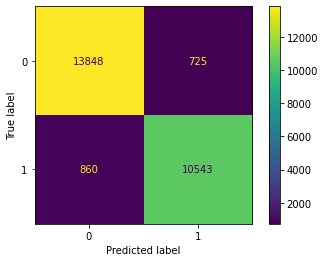

In [ ]:
predictions = (model.predict(X_test)).astype(int)
cm = confusion_matrix(y_test, predictions, labels=np.array([0, 1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['0', '1']))
disp.plot()
plt.show()

# **D. LƯU MÔ HÌNH**

## 1. Triển khai thuật toán lưu mô hình

In [ ]:
class ModelBox:
  def __init__(self, model=None):
    self.model = model

  '''
  FOR SAVING MODEL
  '''
  def map_node(self, map, node, id=0):
    map[id] = node
    if node.left != None:
      map = self.map_node(map=map, node=node.left, id=id*2+1)
    if node.right != None:
      map = self.map_node(map=map, node=node.right, id=id*2+2)
    return map

  def info(self, map, id):
    res = []
    res.append(id)
    node = map[id]
    res.append(node.feature_index) if node.feature_index != None else res.append('-')
    res.append(node.threshold) if node.threshold != None else res.append('-')
    res.append(id*2+1) if node.left != None else res.append('-')
    res.append(id*2+2) if node.left != None else res.append('-')
    res.append(node.info_gain_ratio) if node.info_gain_ratio != None else res.append('-')
    res.append(node.value) if node.value != None else res.append('-')
    res.append(node.curr_depth) if node.curr_depth != None else res.append('-')
    return res   

  def save_model_to(self, file_path=None):
    if file_path == None:
      print('Error: Path does not match!')
    else:
      '''
      Maping node data
      '''
      map = {}
      map = self.map_node(map=map, node=self.model.root, id=0)

      model_data = [self.info(map, id) for id in map]

      '''
      Write to file
      '''
      file = open(file_path, mode='w')

      for x in model_data:
        for y in x:
          file.write(str(y) + ' ')
        file.write('\n')

      file.close()
      print('Successfully!')

  
  '''
  FOR LOADING MODEL
  '''  
  def load_model_from(self, file_path=None):
    if file_path == None:
      print('Error: Path does not match!')
    else:
      file = open(file_path, mode='r')

      data = file.readlines()
      '''
      Maping node
      '''

      map = {}
      
      max_depth = 0

      for line in data:
        node_data = line.split()

        id = int(node_data[0])
        feature_index = int(node_data[1]) if node_data[1]!='-' else None
        threshold = float(node_data[2]) if node_data[2]!='-' else None
        left_id = int(node_data[3]) if node_data[3]!='-' else None
        right_id = int(node_data[4]) if node_data[4]!='-' else None
        info_gain_ratio = float(node_data[5]) if node_data[5]!='-' else 0
        value = float(node_data[6]) if node_data[6]!='-' else None
        curr_depth = int(node_data[7])

        if curr_depth > max_depth:
          max_depth = curr_depth

        map[id] = Node(feature_index=feature_index, 
                       threshold=threshold, 
                       left=None, right=None, 
                       info_gain_ratio=info_gain_ratio, 
                       value=value, curr_depth=curr_depth)
        
      '''
      Rebuild decision tree
      '''
      for id in map:
        node = map[id]
        if id*2+1 in map:
          node.left = map[id*2+1]
        if id*2+2 in map:
          node.right = map[id*2+2]

      if self.model==None:
        self.model = DecisionTreeClassifier(max_depth=max_depth)

      self.model.root = map[0]

      file.close()
      print('Successfully!')

      return self.model      

## 2. Lưu mô hình

In [ ]:
saving_box = ModelBox(model=model)

In [ ]:
saving_box.save_model_to('/content/drive/MyDrive/Colab Notebooks/AI Project/DecisionTreeClassifier/model.txt')

Successfully!


## 3. Tải lại mô hình

In [ ]:
loading_box = ModelBox()

In [ ]:
reloaded_model = loading_box.load_model_from('/content/drive/MyDrive/Colab Notebooks/AI Project/DecisionTreeClassifier/model.txt')

Decision Tree Classifier(min_samples_split=2, max_depth=21)
Successfully!


In [ ]:
print(classification_report(y_val, reloaded_model.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     17555
         1.0       0.95      0.92      0.93     13617

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



In [ ]:
print(classification_report(y_test, reloaded_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     14573
         1.0       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



$\Longrightarrow$ Việc lưu mô hình đã đạt được mục đích lưu và sử dụng lại



---

